In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from mlxtend.plotting import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from utils import *
import matplotlib.pyplot as plt


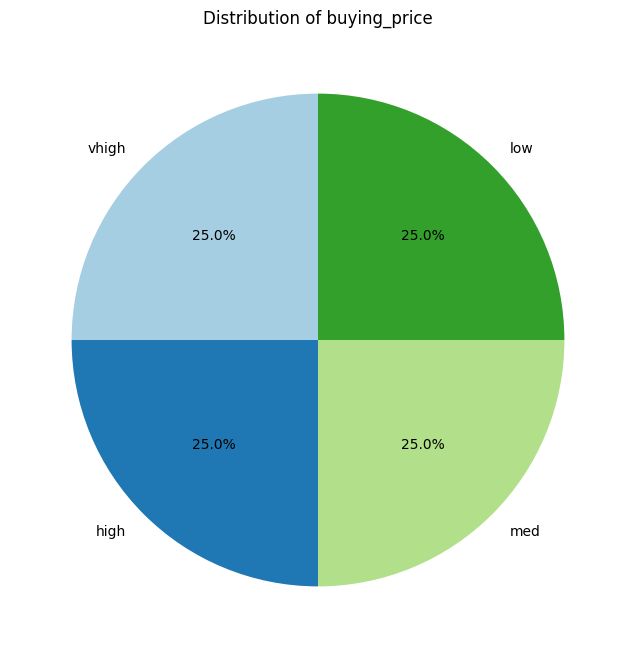

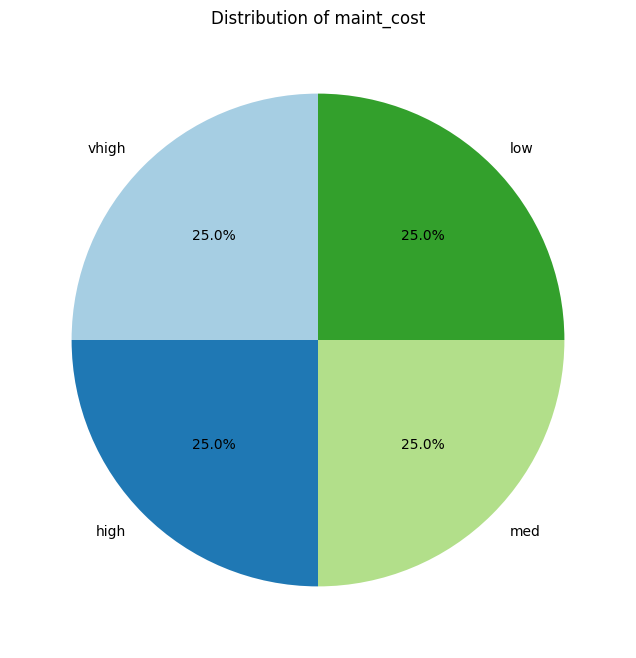

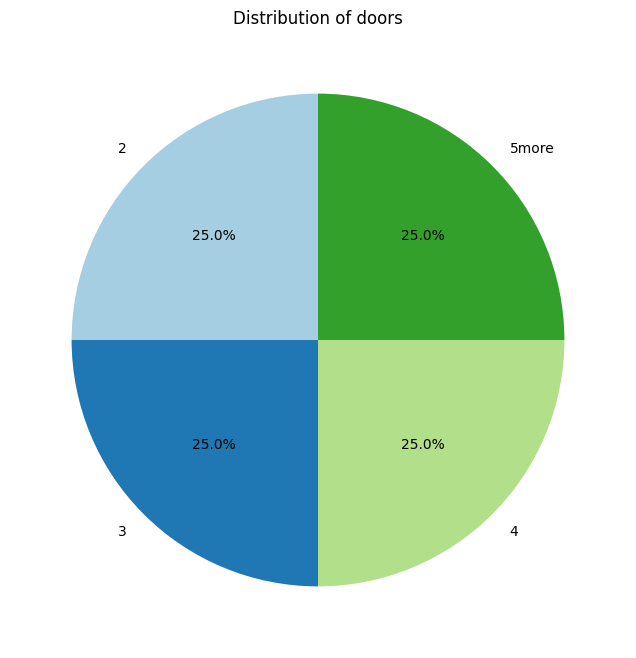

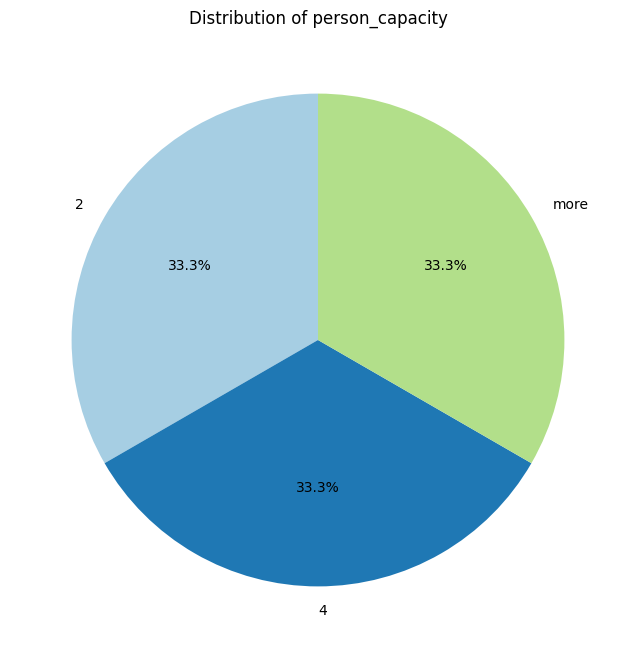

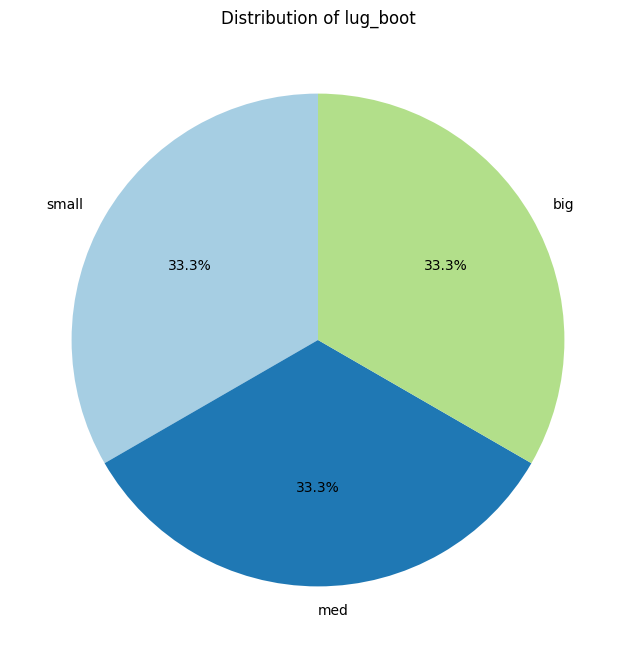

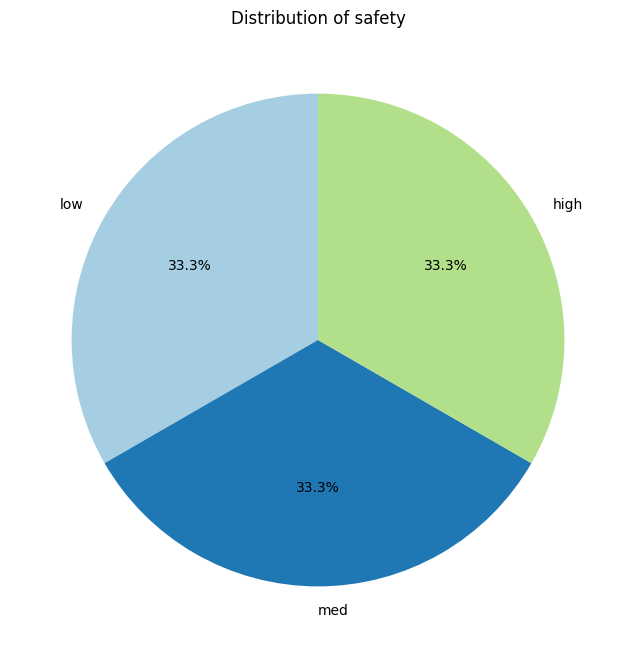

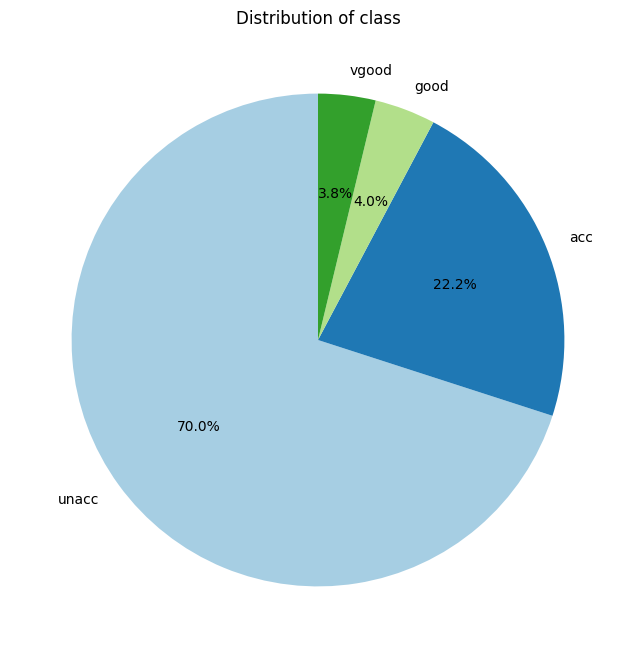

In [276]:
column_names = ['buying_price', 'maint_cost', 'doors', 'person_capacity', 'lug_boot', 'safety', 'class']
car_data = pd.read_csv('car_data.csv', names=column_names)

for column in car_data.columns:
    plt.figure(figsize=(8, 8))
    car_data[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    plt.title(f'Distribution of {column}')
    plt.ylabel('')
    plt.show()

price_mapped = {'vhigh': 0, 'high': 1, 'low': 2, 'med': 3}
car_data['buying_price'] = car_data['buying_price'].map(price_mapped)

maint_mapped = {'vhigh': 0, 'high': 1, 'low': 2, 'med': 3}
car_data['maint_cost'] = car_data['maint_cost'].map(maint_mapped)

door_mapped = {'2': 0, '3': 1, '4': 2, '5more' : 3}
car_data['doors'] = car_data['doors'].map(door_mapped)

people_mapped = {'2': 0, '4': 1, 'more': 2}
car_data['person_capacity'] = car_data['person_capacity'].map(people_mapped)

boot_mapped = {'small': 0, 'med': 1, 'big': 2}
car_data['lug_boot'] = car_data['lug_boot'].map(boot_mapped)

safe_mapped = {'high': 0, 'med': 1, 'low': 2}
car_data['safety'] = car_data['safety'].map(safe_mapped)

class_mapped = {'unacc': 0, 'acc': 1, 'vgood': 2, 'good': 3}
car_data['class'] = car_data['class'].map(class_mapped)

car_data_processed = pd.get_dummies(car_data, drop_first=False)

X = car_data_processed.drop('class', axis=1)
y = car_data_processed['class']

Train test split

In [277]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2988)

Random Forest Model

In [278]:
random_forest_model = RandomForestClassifier(random_state=2988)

random_forest_model.fit(X_train, y_train)

y_pred = random_forest_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2%}")


Model Accuracy: 97.69%


Confusion Matrix


Confusion Matrix:
[[240   2   0   0]
 [  2  72   0   0]
 [  0   1  13   1]
 [  0   1   1  13]]


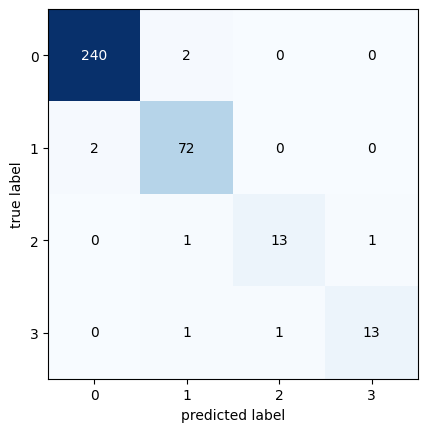

In [279]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
plot_confusion_matrix(conf_matrix)
print(conf_matrix)

In [280]:
precision = np.sum((y_pred == 1) & (y_test == 1)) / np.sum(y_pred == 1)
recall = np.sum((y_pred == 1) & (y_test == 1)) / np.sum(y_test == 1)
f1 = 2 * (precision * recall) / (precision + recall)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Precision: 0.95
Recall: 0.97
F1 Score: 0.96


Graphs

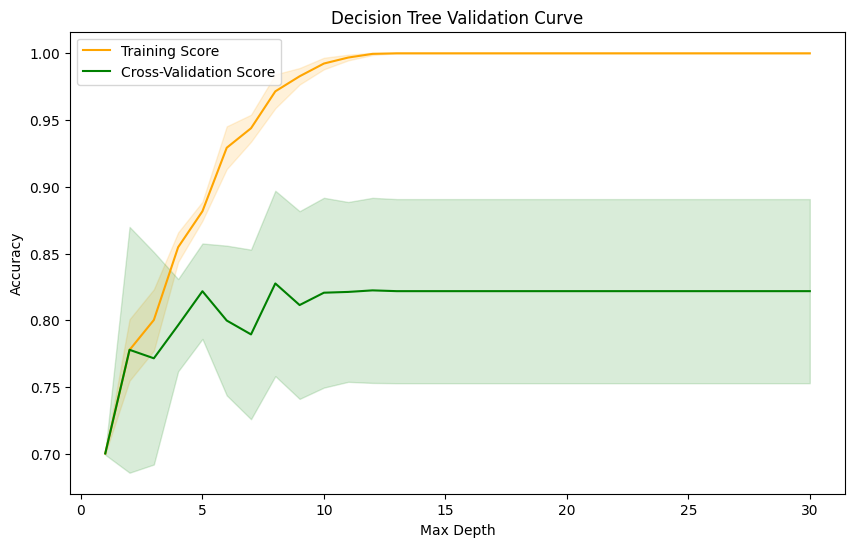

In [281]:
decision_tree_model = DecisionTreeClassifier(random_state=2988)

param_range = np.arange(1, 31)

train_scores, test_scores = validation_curve(
    decision_tree_model, X, y, param_name='max_depth', scoring='accuracy', cv=5, param_range=param_range
    )

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, label='Training Score', color='orange')
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.15, color='orange')
plt.plot(param_range, test_mean, label='Cross-Validation Score', color='green')
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
plt.title('Decision Tree Validation Curve')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
